In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cluster_mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Feature Engineering And Data Preparation:

In [5]:
df['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [6]:
df_w_dummies = pd.get_dummies(df.drop('name', axis = 1), dtype = int)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#A different type of scaler that scales features between 0 and 1, whose range can be overridden

In [8]:
scaler = MinMaxScaler()

In [9]:
scaled_data = scaler.fit_transform(df_w_dummies)

In [10]:
scaled_data

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]], shape=(392, 10))

In [11]:
scaled_df = pd.DataFrame(scaled_data, columns = df_w_dummies.columns)

Preliminary Heatmaps:

<Axes: >

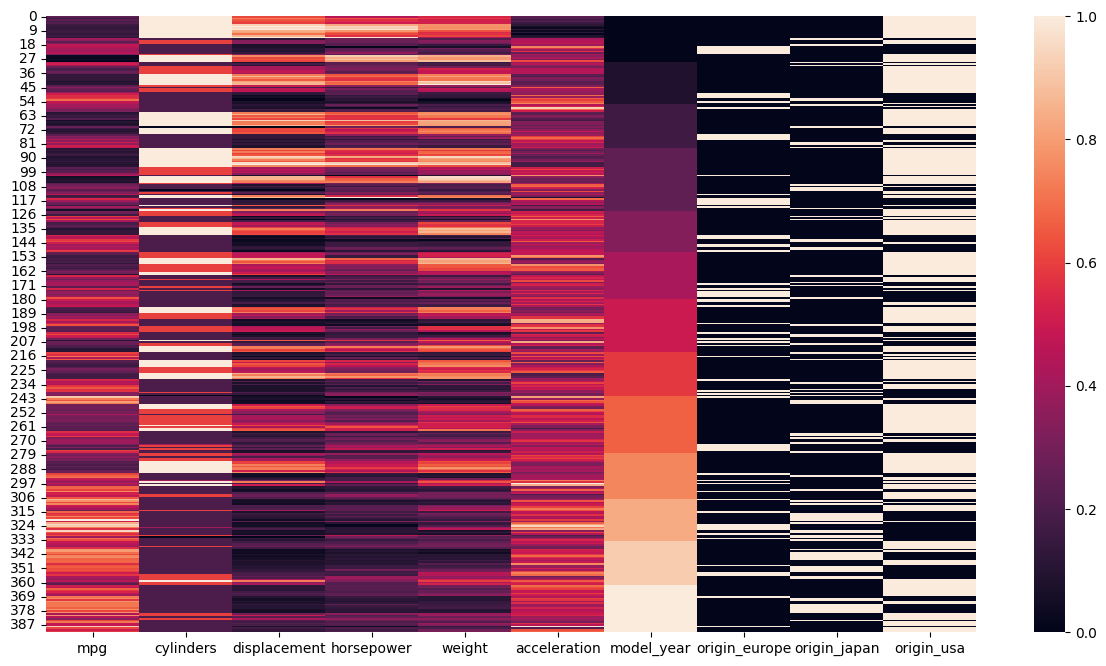

In [16]:
plt.figure(figsize = (15, 8))
sns.heatmap(scaled_df)

In [15]:
len(df)

392

<Figure size 1500x800 with 0 Axes>

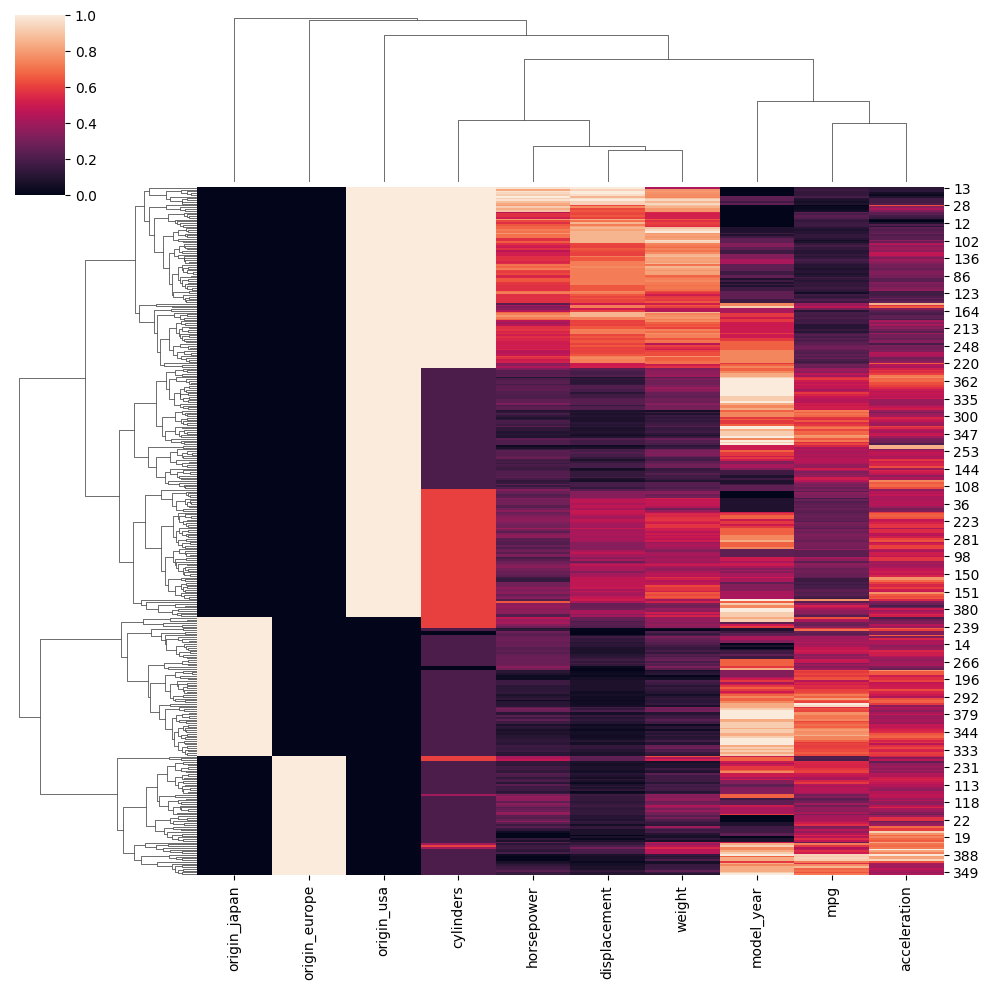

In [ ]:
plt.figure(figsize = (15, 8))
sns.clustermap(scaled_df)
#Note; If the dataset is large, this could take a while or even kill your kernel!

<Figure size 1500x800 with 0 Axes>

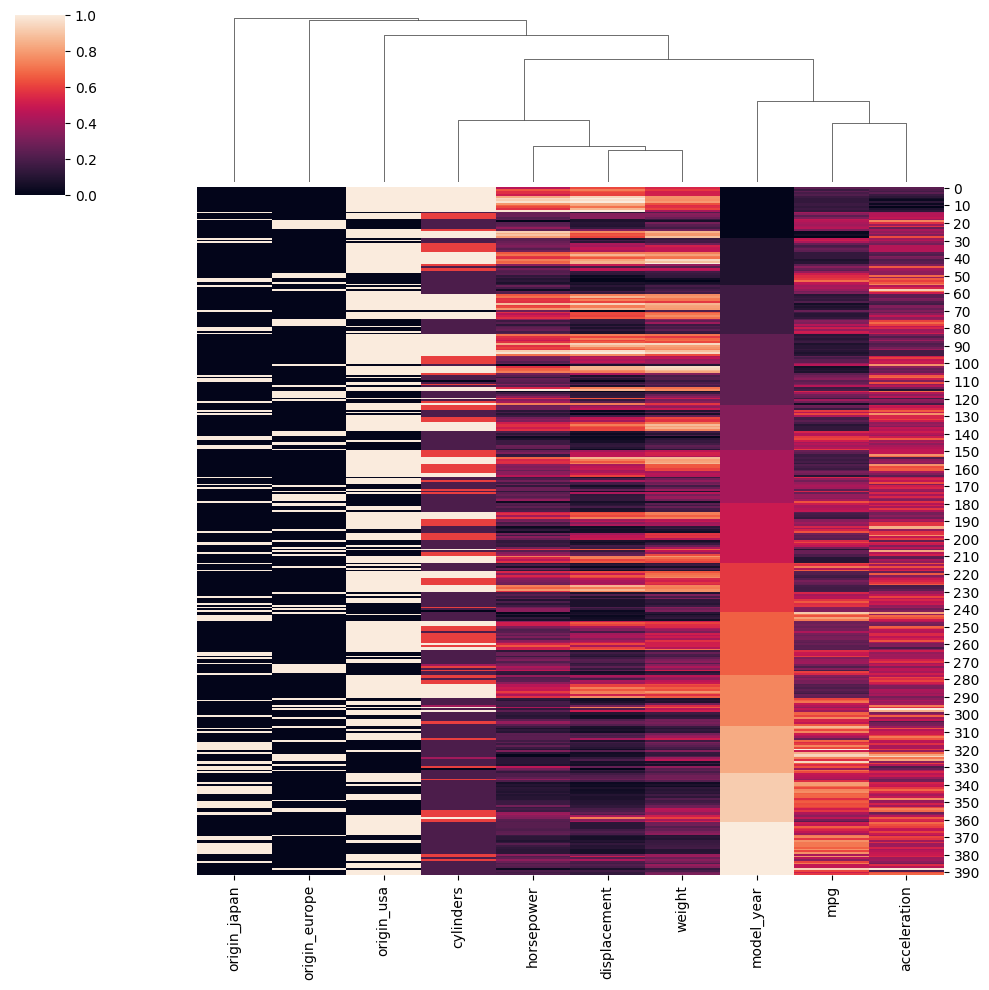

In [ ]:
plt.figure(figsize = (15, 8))
sns.clustermap(scaled_df, row_cluster = False)
#Clustering features only

In [19]:
scaled_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454,-0.565161
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209,0.610494
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825,0.655936
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936,0.489625
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929,0.600978
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020,-0.258224
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841,-0.136065
origin_europe,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157,-0.591434
origin_japan,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000,-0.648583
origin_usa,-0.565161,0.610494,0.655936,0.489625,0.600978,-0.258224,-0.136065,-0.591434,-0.648583,1.000000


<Axes: >

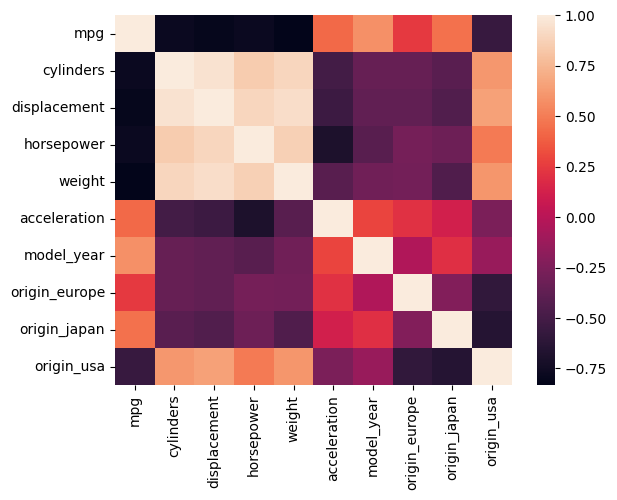

In [20]:
sns.heatmap(scaled_df.corr())

<Figure size 1500x800 with 0 Axes>

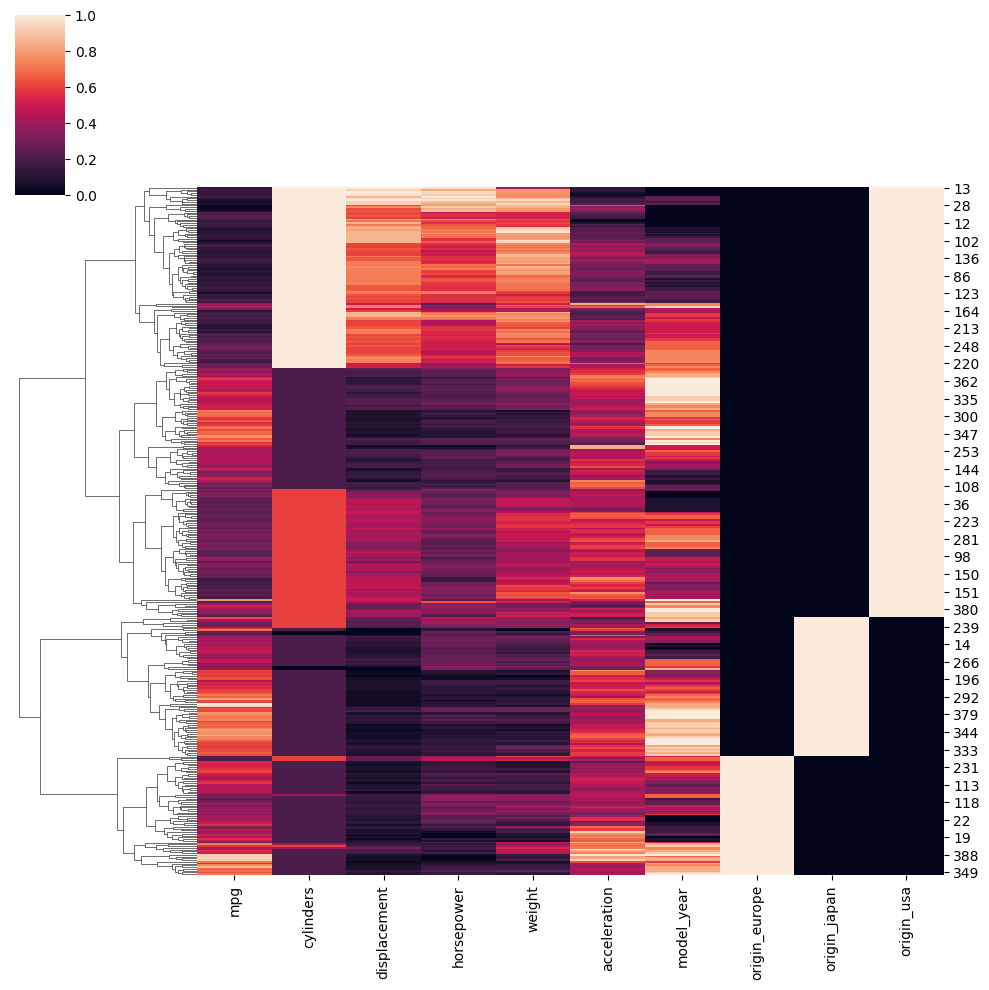

In [21]:
plt.figure(figsize = (15, 8))
sns.clustermap(scaled_df, col_cluster = False)
#Clustering entries only; This is the goal for hierarchical clustering

Hierarchical Clustering With Scikit-Learn By Choosing The Number Of Clusters Beforehand:

In [22]:
from sklearn.cluster import AgglomerativeClustering
#Hierarchical Clustering is referred to as Agglomerative Clustering by scikit learn because it recusrively merges pairs of clusters until there's one cluster left

In [23]:
model = AgglomerativeClustering(n_clusters = 4)

In [24]:
cluster_labels = model.fit_predict(scaled_df)

In [25]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<Axes: xlabel='mpg', ylabel='weight'>

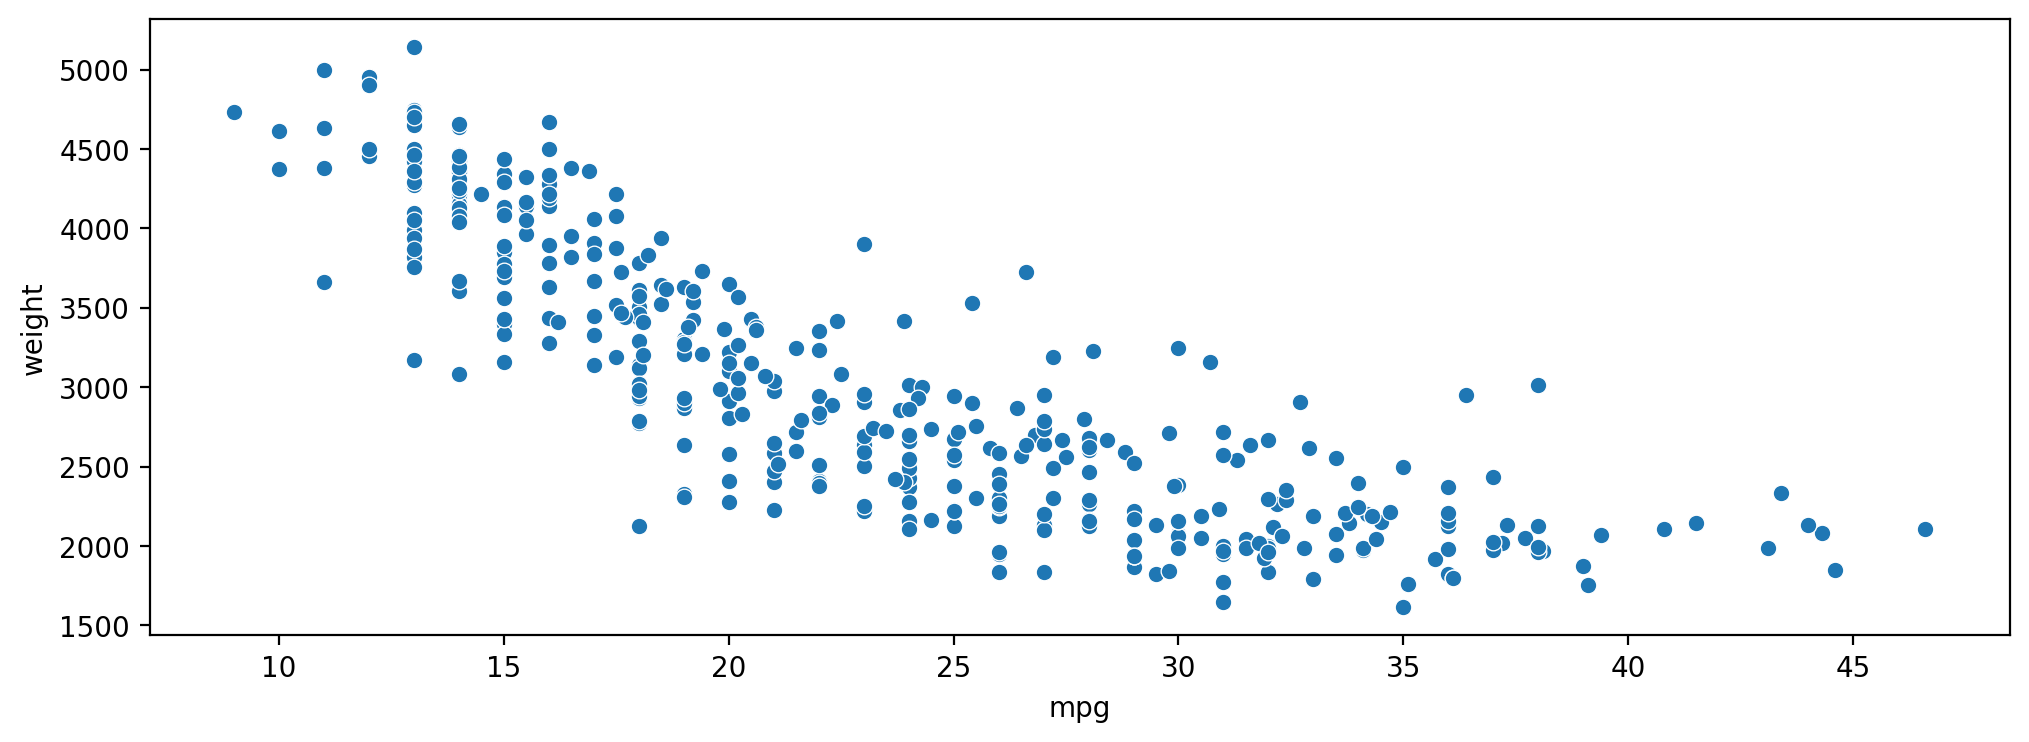

In [26]:
plt.figure(figsize = (12, 4), dpi = 200)
sns.scatterplot(data = df, x = 'mpg', y = 'weight')

<Axes: xlabel='mpg', ylabel='weight'>

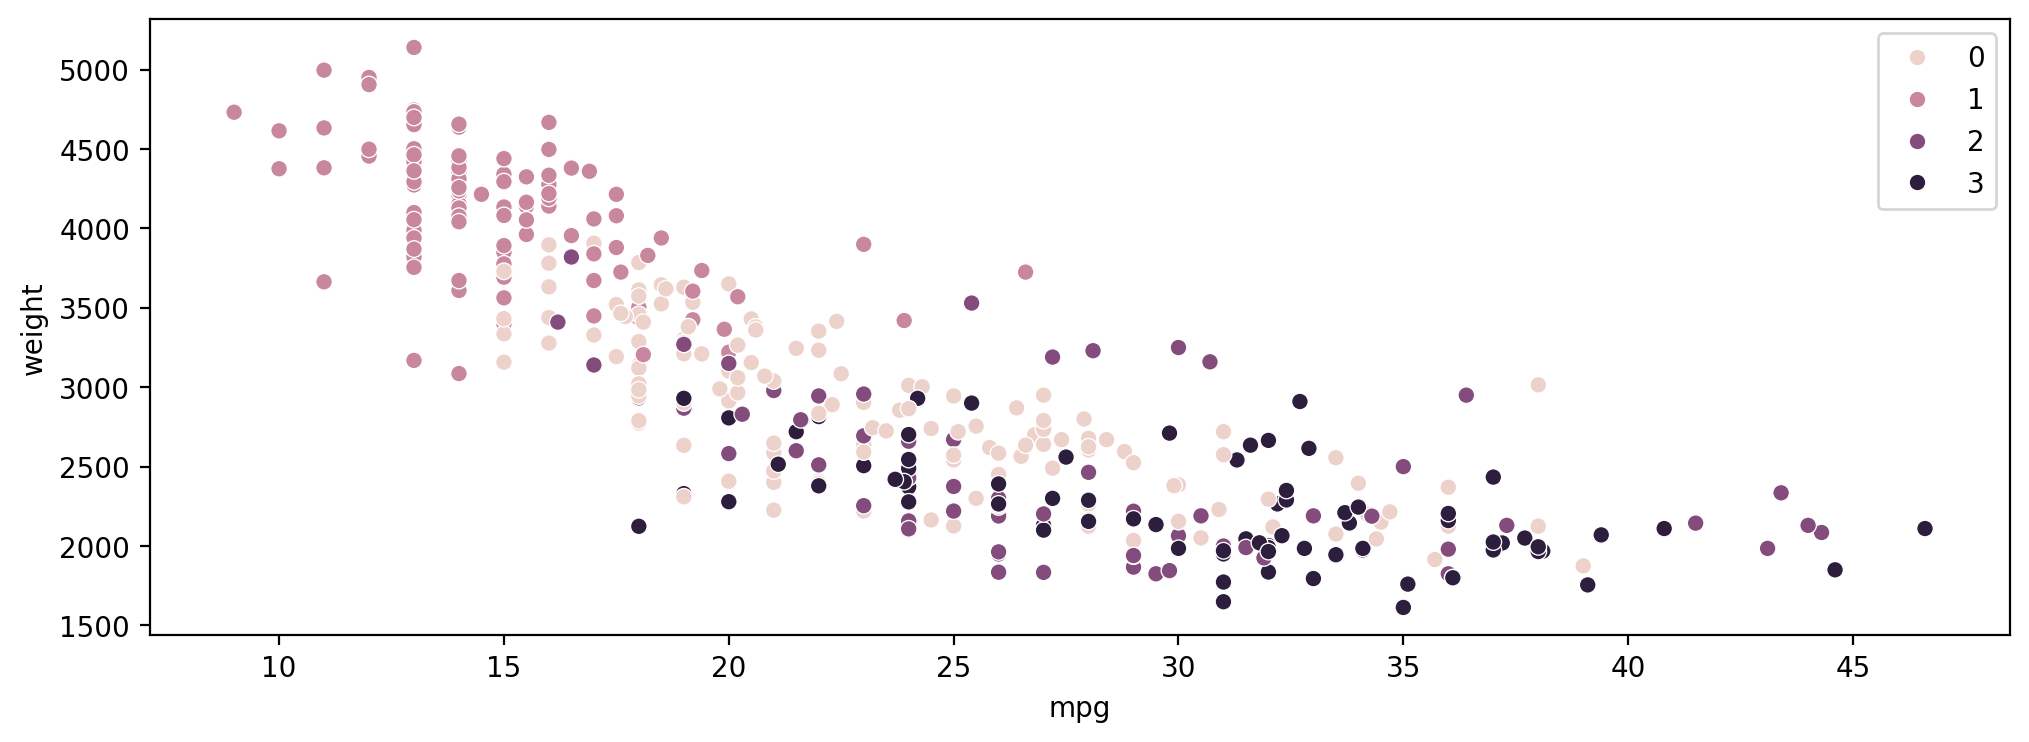

In [ ]:
plt.figure(figsize = (12, 4), dpi = 200)
sns.scatterplot(data = df, x = 'mpg', y = 'weight', hue = cluster_labels)
#It appears as if there are clusters based partially on the cars' efficiency (mpg / weight)

<Axes: xlabel='mpg', ylabel='horsepower'>

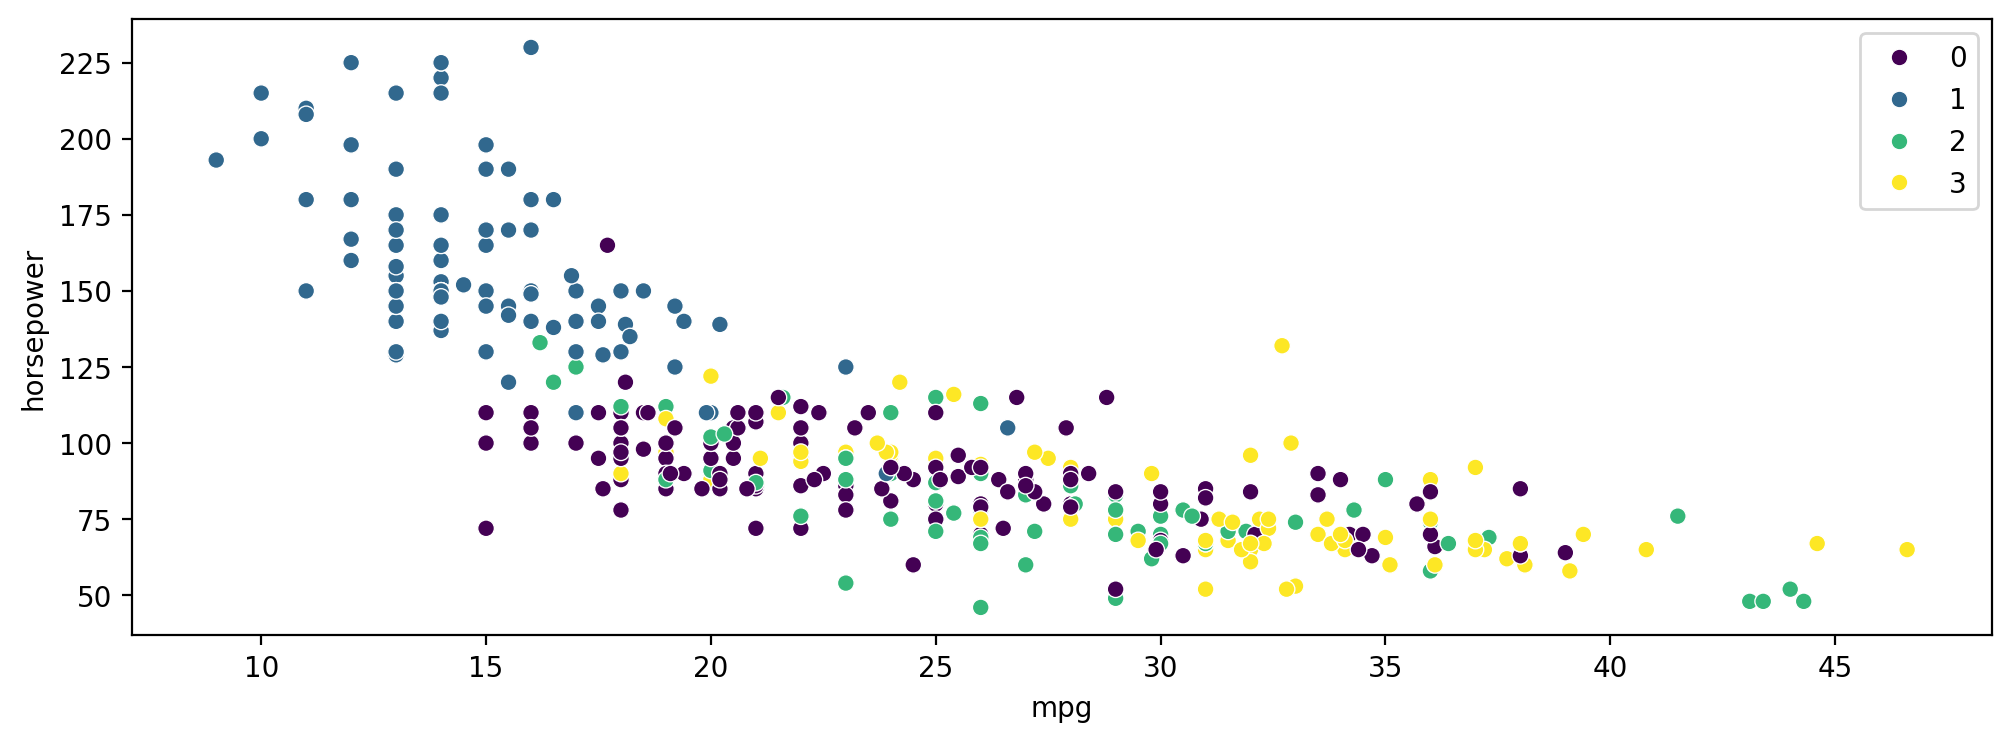

In [29]:
plt.figure(figsize = (12, 4), dpi = 200)
sns.scatterplot(data = df, x = 'mpg', y = 'horsepower', hue = cluster_labels, palette = 'viridis')

In [30]:
model = AgglomerativeClustering(n_clusters = 3)

In [31]:
cluster_labels = model.fit_predict(scaled_df)

<Axes: xlabel='mpg', ylabel='weight'>

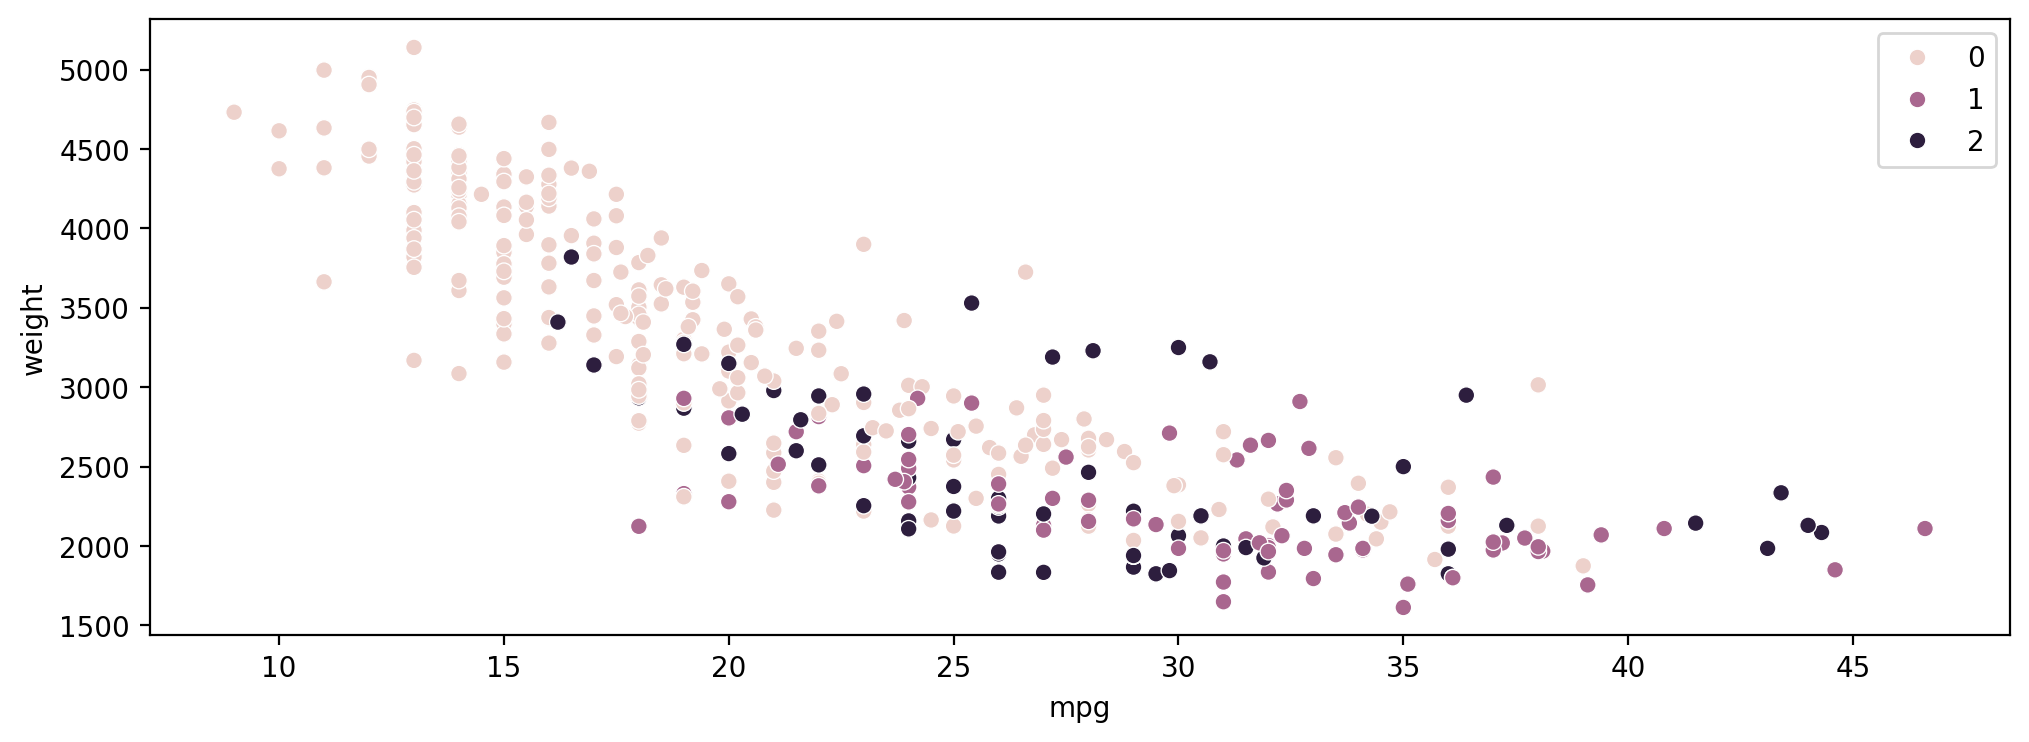

In [32]:
plt.figure(figsize = (12, 4), dpi = 200)
sns.scatterplot(data = df, x = 'mpg', y = 'weight', hue = cluster_labels)

<Axes: xlabel='mpg', ylabel='horsepower'>

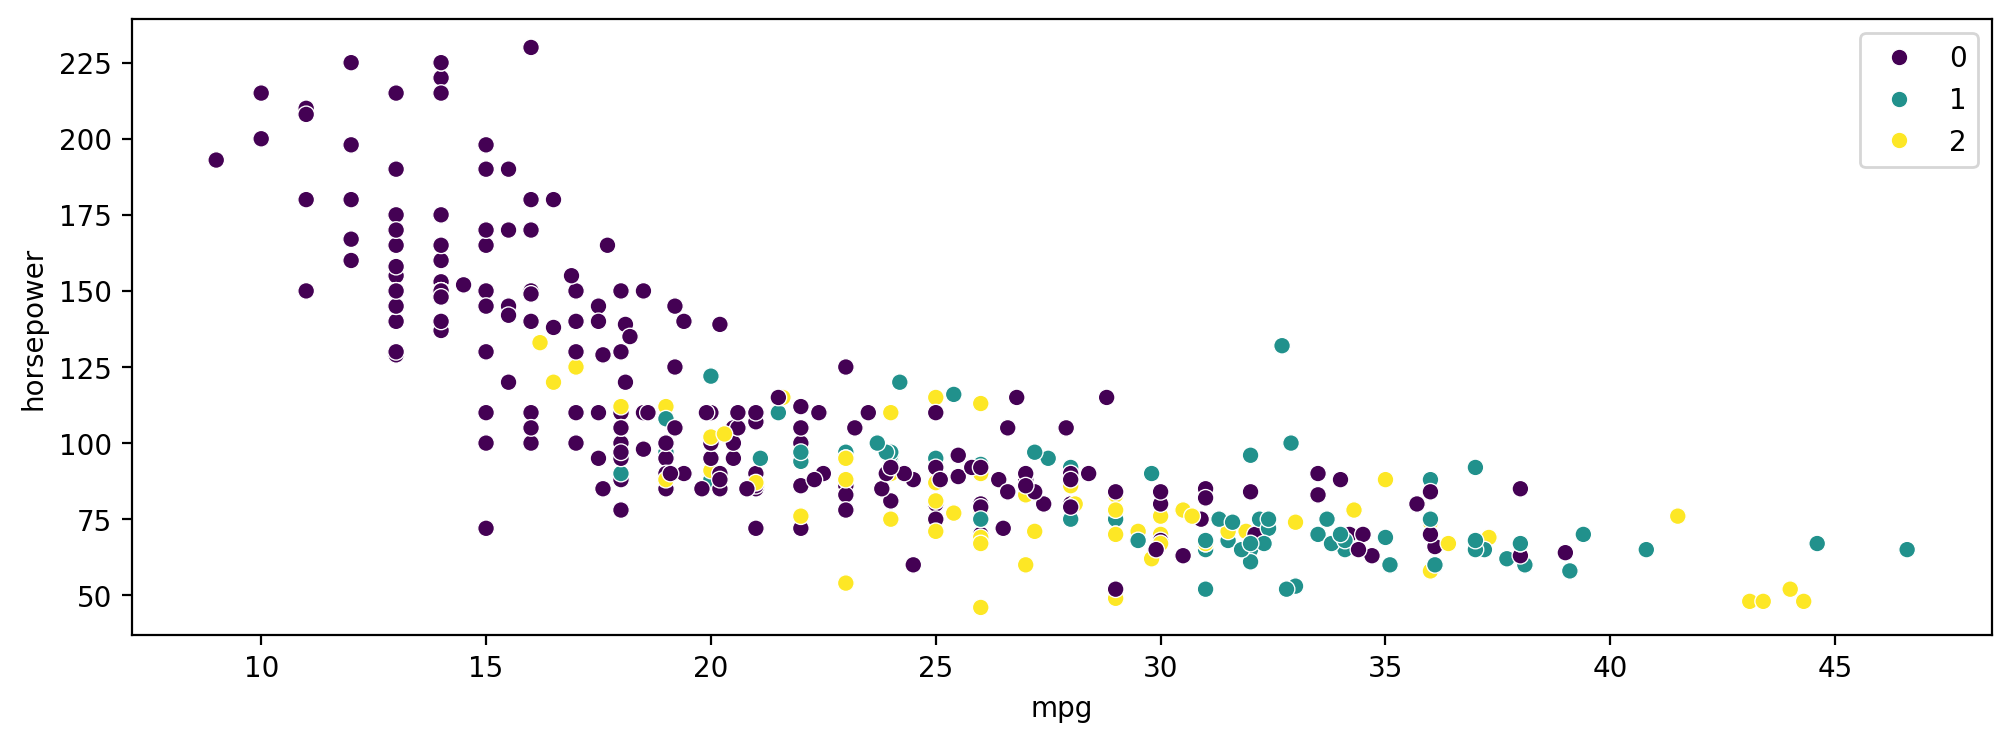

In [33]:
plt.figure(figsize = (12, 4), dpi = 200)
sns.scatterplot(data = df, x = 'mpg', y = 'horsepower', hue = cluster_labels, palette = 'viridis')

Hierarchical Clustering Without Knowing The Number Of Clusters Beforehand:

In [34]:
# make distance possible?
# sqrt(N_features)

In [35]:
len(scaled_df.columns)

10

In [ ]:
np.sqrt(10) # MAX DISTANCE POSSIBLE BETWEEN TWO POINTS (MIN/MAX SCALING)

np.float64(3.1622776601683795)

In [37]:
model = AgglomerativeClustering(n_clusters = None, distance_threshold = 0)
#The distance_threshold parameter specified the linkage distance threshold above which, clusters won't be merged
#n_clusters must be set to 'None' when using the distance_threshold parameter
#Using 0 for distance_threshold will make each data entry its own cluster

In [38]:
cluster_labels = model.fit_predict(scaled_df)

In [39]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [50]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [51]:
linkage_matrix = hierarchy.linkage(model.children_)

In [52]:
linkage_matrix
#Each row of the linkage matrix maps two clusters to be combined (columns 1 and 2) into a new cluster.
#The third number in the row is the distance between the two clusters
#The fourth number is the number of points in the cluster
#The linkage matrix is the mathematical information used to plot out the dendrogram

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]],
      shape=(390, 4))

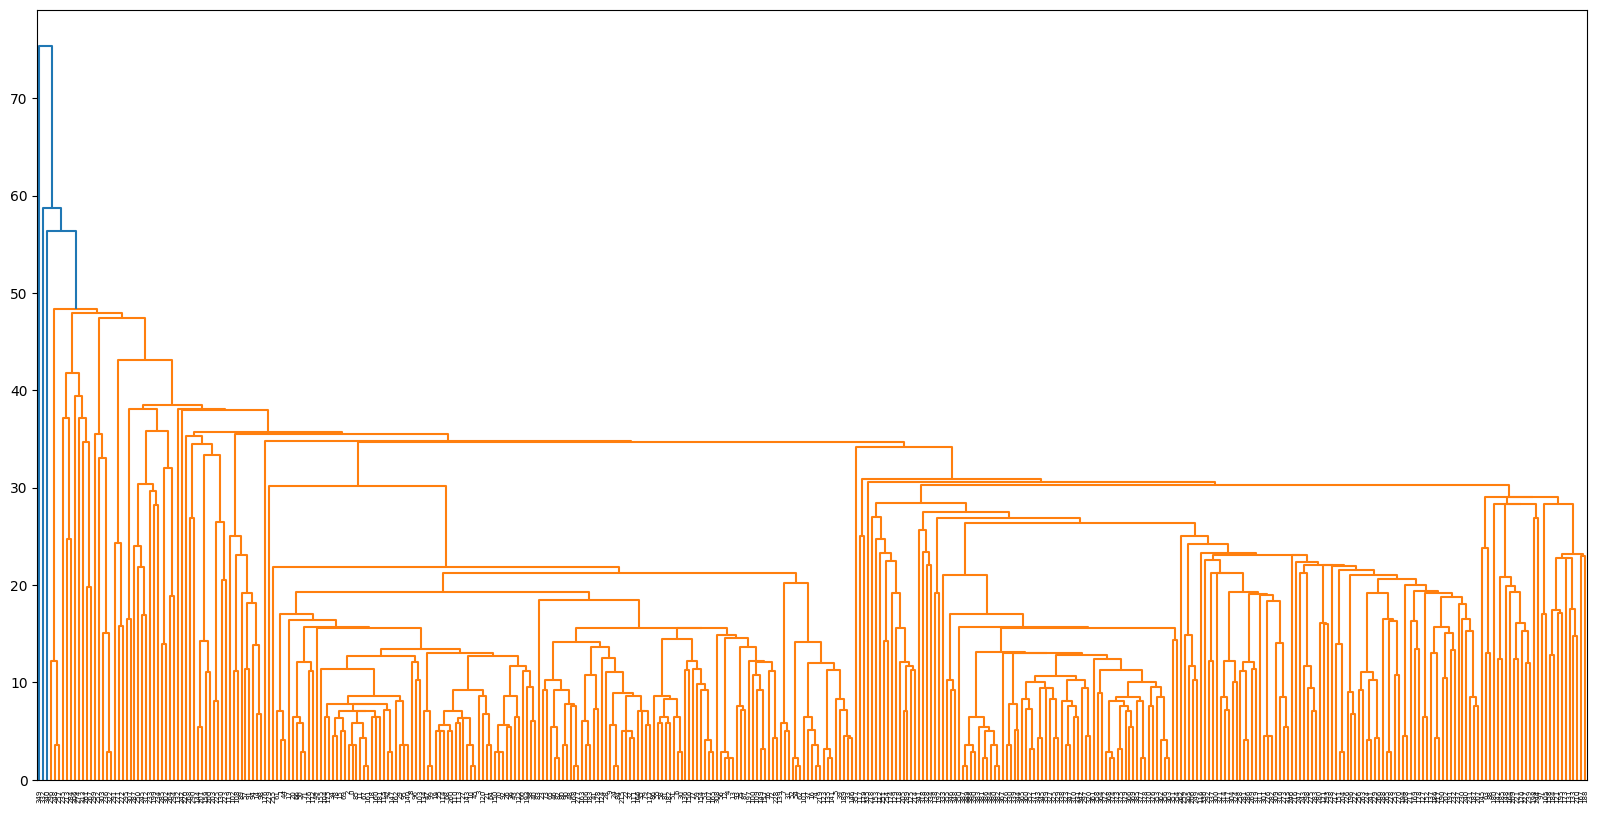

In [53]:
plt.figure(figsize = (20, 10))
dendro = dendrogram(linkage_matrix)
#A dendrogram shows the linkage between clusters

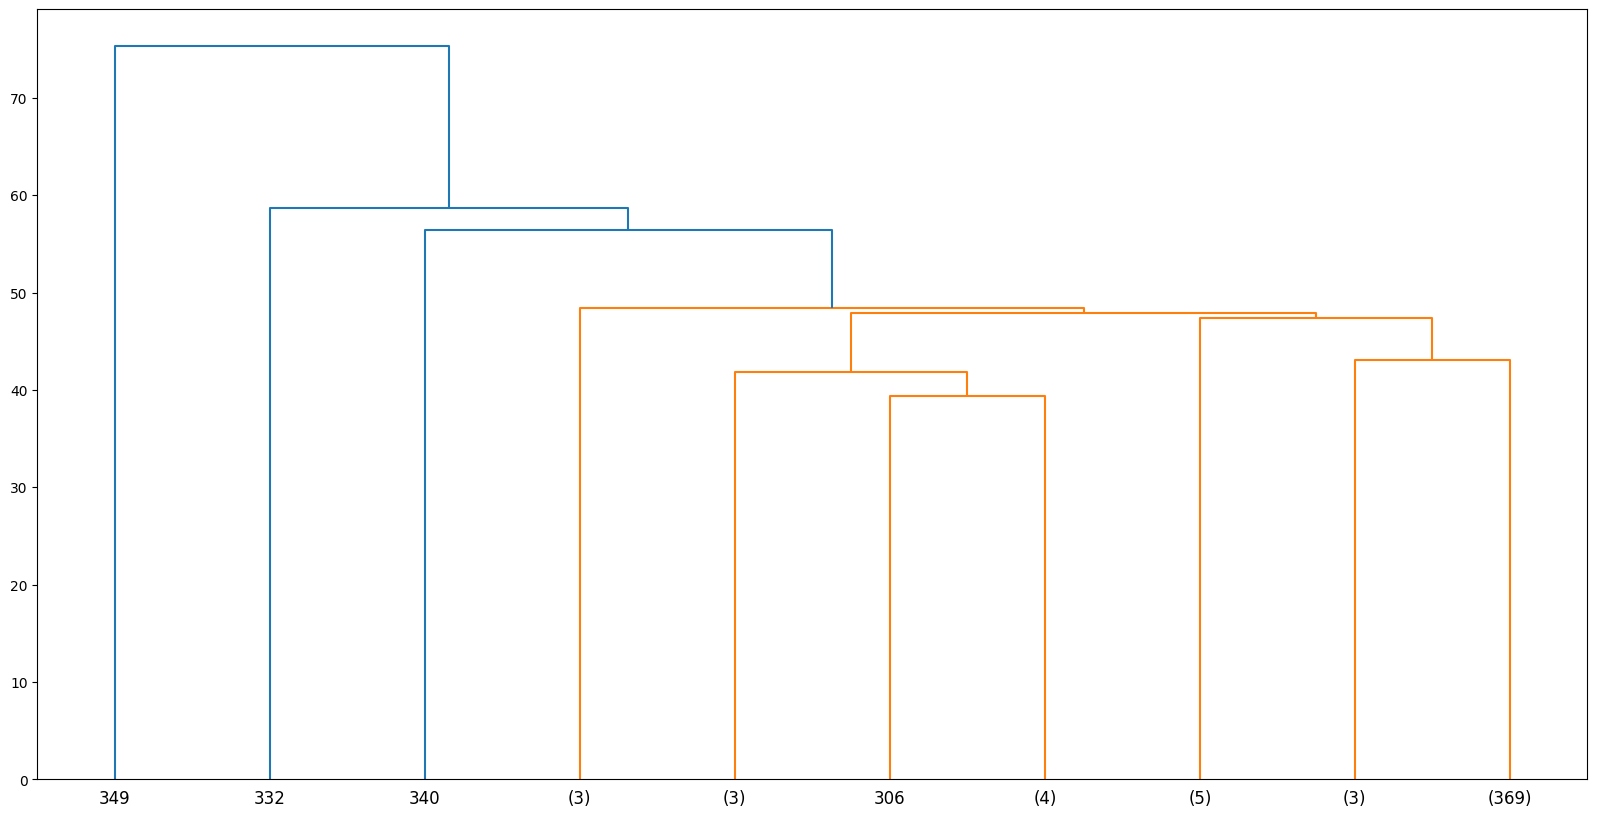

In [ ]:
plt.figure(figsize = (20, 10))
dendro = dendrogram(linkage_matrix, truncate_mode = 'lastp', p = 10)
#The lastp truncation mode specifies the max number of branches the dendrogram can have
#As you begin to truncate, you aren't able to interpret the axis as well anymore

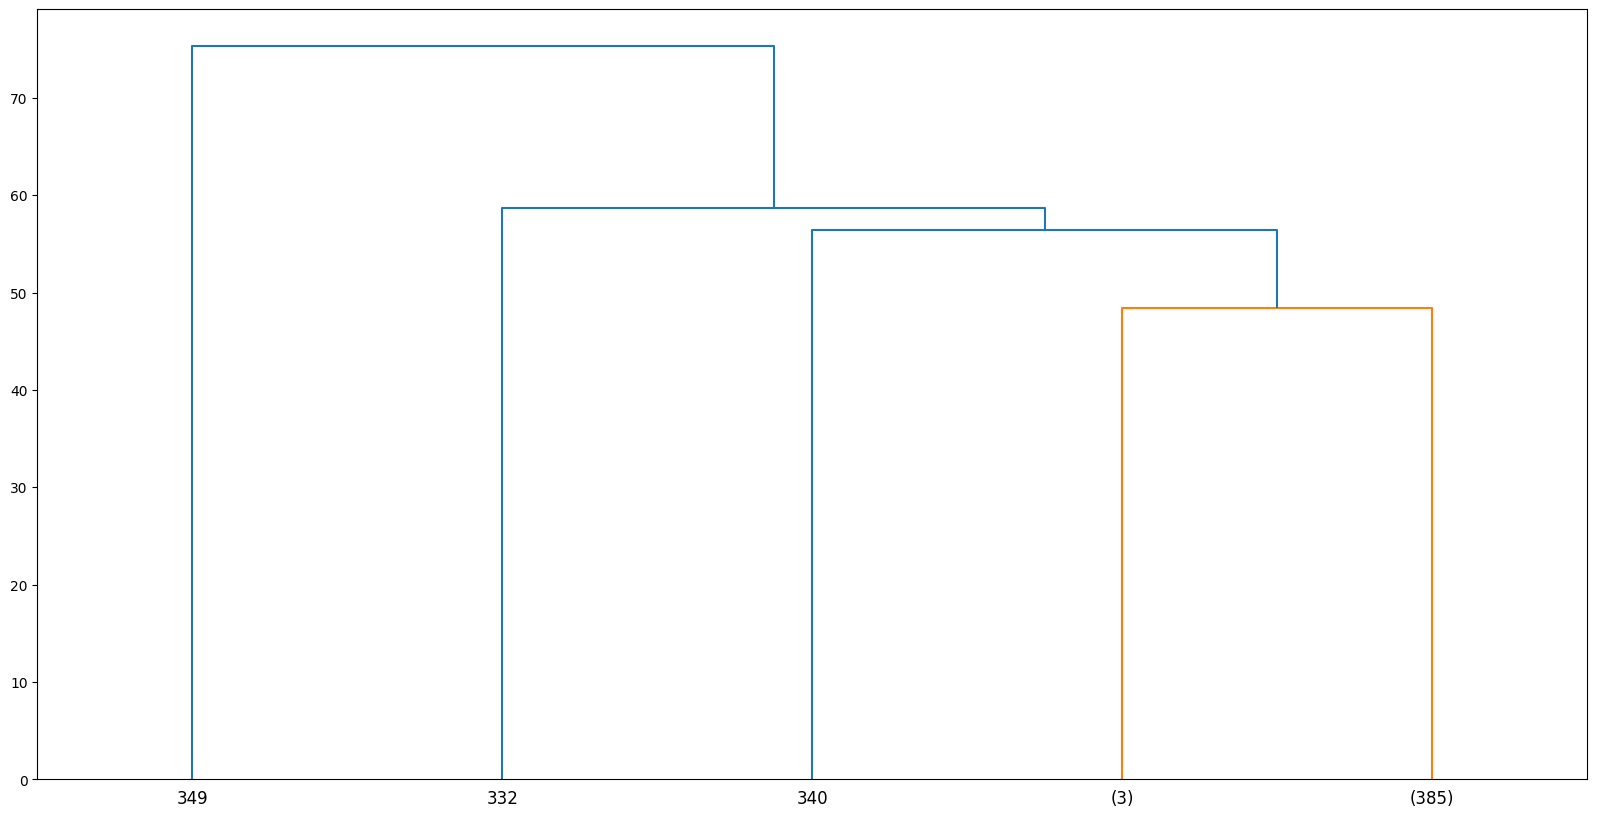

In [ ]:
plt.figure(figsize = (20, 10))
dendro = dendrogram(linkage_matrix, truncate_mode = 'level', p = 3)
#The level truncation mode specifies the max number of levels the dendrogram can have

In [56]:
scaled_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
np.sqrt(len(scaled_df.columns)) #Remember: This is only a theoretical max distance

np.float64(3.1622776601683795)

In [ ]:
scaled_df['mpg'].idxmax() #Car with actual max mpg

320

In [60]:
scaled_df['mpg'].idxmin() #Car with actual min mpg

28

In [62]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

In [ ]:
distance = np.linalg.norm(car_a - car_b)
#Calculating the Euclidian Distance between the cars with the max and min mpg

In [ ]:
distance #Keep in mind this is the distnace between two points, not two clusters

np.float64(2.3852929970374714)

In [65]:
model = AgglomerativeClustering(n_clusters = None, distance_threshold = 2)

In [66]:
cluster_labels = model.fit_predict(scaled_df)

In [67]:
cluster_labels

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  4,
        4,  1,  0,  0,  0,  0,  0,  4,  3,  3,  3,  3,  1,  7,  1,  4,  4,
        4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  7,  4,  4,  7,  0,  0,
        0,  1,  1,  0,  7,  1,  7,  0,  7,  7,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  1,  3,  3,  3,  3,  0,  0,  0,  0,  7,  1,  1,  7,  1,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  0,
        3,  3,  3,  3,  4,  1,  7,  1,  1,  7,  4,  0,  3,  3,  0,  0,  0,
        0,  3,  0, 10,  3,  4,  4,  4,  1,  7,  1,  7,  4,  4,  4,  3,  3,
        3,  3,  3,  0,  0,  0,  1,  1,  7,  0,  0,  1,  1,  0,  4,  4,  4,
        4,  5,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  1,  7,  4,  7,  1,
        0,  1,  4,  0,  4,  0,  0,  0,  0,  1,  0,  0,  7,  7,  0,  5,  5,
        5,  5,  4,  4,  4,  4,  7,  7,  0,  1,  9,  4,  9,  4,  0,  1,  1,
        7,  0,  5,  8, 10,  0,  5,  5,  5,  5,  1,  2,  8,  7,  1,  5,  5,
        5,  5,  9,  9,  9

In [68]:
linkage_matrix = hierarchy.linkage(model.children_)

In [69]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]],
      shape=(390, 4))

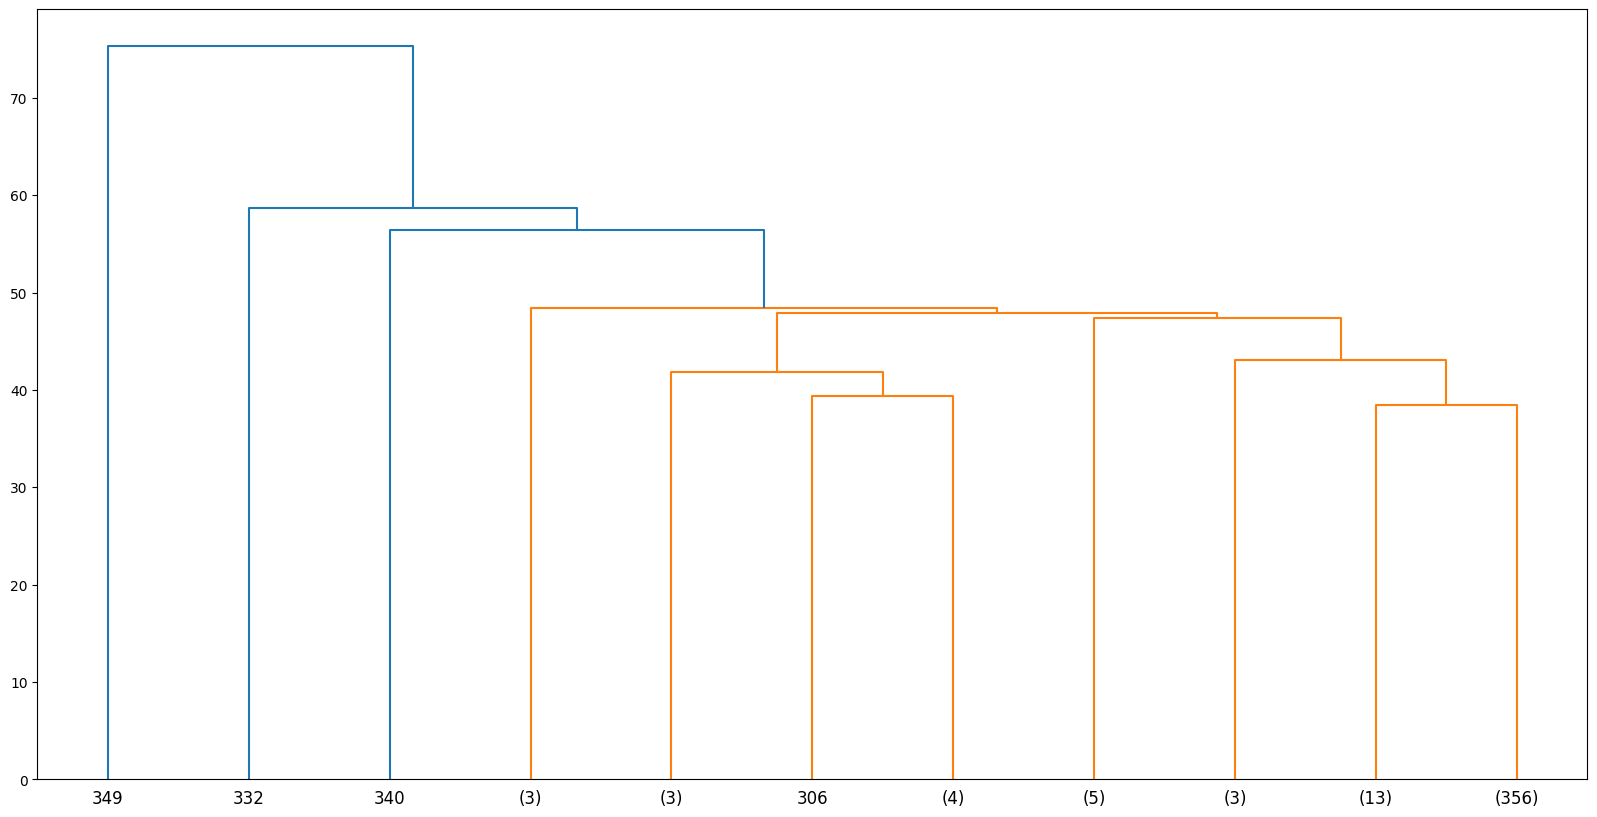

In [71]:
plt.figure(figsize = (20, 10))
dendro = dendrogram(linkage_matrix, truncate_mode = 'lastp', p = 11)